# Name : Sonu Kumar Pal
# Task 6 : Exploratory Data Analysis on Indian Premier League Dataset
# Problem Statement : Find out the most successful teams, players and factors contributing win or loss of a team

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,9)
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Datasets

In [6]:
ipl = pd.read_csv('matches.csv')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Data Preprocessing

In [7]:
ipl.shape

(756, 18)

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Exploratory data analysis

In [10]:
# Identifying unique values from the season column
ipl['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [11]:
#length of the season year 
len(ipl['season'].unique())

12

## Identifying which team had won by maximum runs

In [16]:
#idxmax() function - will return the id of the maximum value which in turn is fed into.
#iloc() function - that takes an index value and returns the row.
ipl.iloc[ipl['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [18]:
# gets the unique value from overall data
ipl.iloc[ipl['win_by_runs'].idxmax()]['winner'] 

'Mumbai Indians'

## Identifying which team had won by maximum wickets

In [19]:
ipl.iloc[ipl['win_by_wickets'].idxmax()]['winner'] 

'Kolkata Knight Riders'

## Identifying which team had won by minimum runs

In [21]:
ipl.iloc[ipl[ipl['win_by_wickets'].ge(1)].win_by_wickets.idxmax()] 

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

## Identifying which team had won by minimum runs

In [22]:
ipl.iloc[ipl[ipl['win_by_runs'].ge(1)].win_by_runs.idxmax()]['winner'] 

'Mumbai Indians'

## Identifying which season had most number of matches

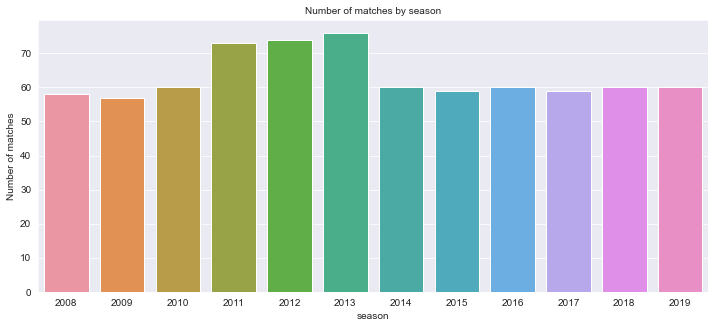

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(data=ipl, x='season')
plt.title('Number of matches by season', fontsize=10)
plt.ylabel('Number of matches')
plt.show()

## Visualization of matches hosted in each city

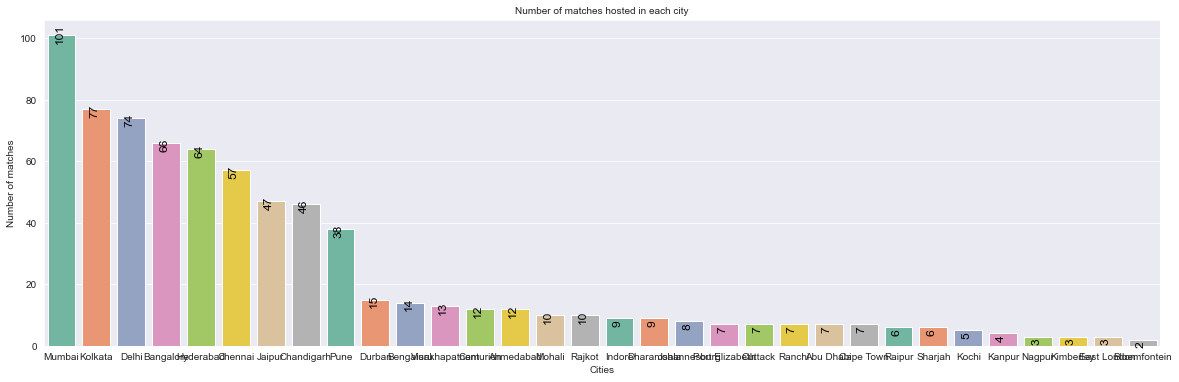

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(ipl['city'], order=ipl['city'].value_counts().index, palette='Set2')
count = 0
cities = pd.DataFrame(ipl['city'].value_counts())
cities['name'] = ipl['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2, i-2, str(i), rotation=90, color='black', size=12)
    count+=1
plt.xlabel('Cities')
plt.title('Number of matches hosted in each city', fontsize=10)
plt.ylabel('Number of matches')
plt.show()

## Number of matches hosted in each stadium

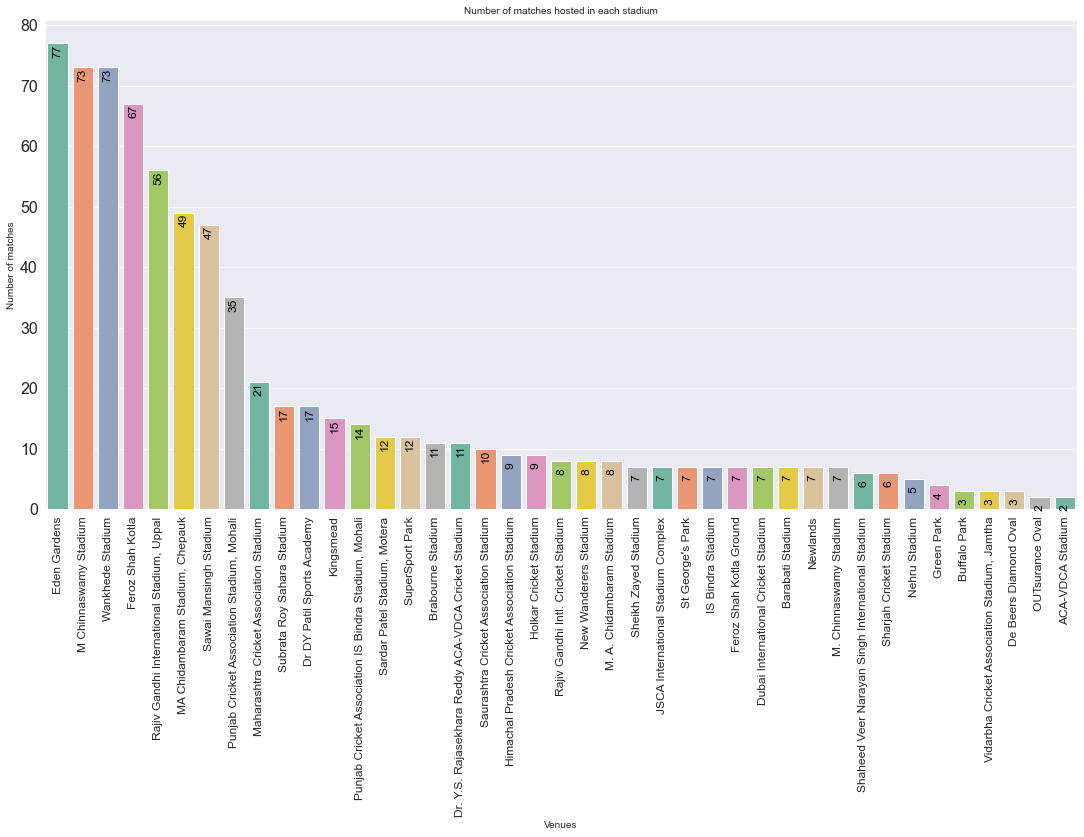

In [26]:
fig = plt.gcf()
fig.set_size_inches(18.5,9)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=16)
sns.countplot(ipl['venue'], order=ipl['venue'].value_counts().index, palette='Set2')
count = 0
venues = pd.DataFrame(ipl['venue'].value_counts())
venues['name'] = ipl['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2, i-2, str(i), rotation=90, color='black', size=12)
    count+=1
plt.xlabel('Venues')
plt.title('Number of matches hosted in each stadium', fontsize=10)
plt.ylabel('Number of matches')
plt.show()

## Visualization of top 10 players who win the match

In [27]:
n_top = 20
players = ipl.player_of_match.value_counts()
players['name'] = players.index
players = players.head(n_top)
print(players)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
V Kohli           12
AM Rahane         12
V Sehwag          11
A Mishra          11
DR Smith          11
AD Russell        11
JH Kallis         10
KA Pollard        10
AT Rayudu          9
SP Narine          9
Name: player_of_match, dtype: object


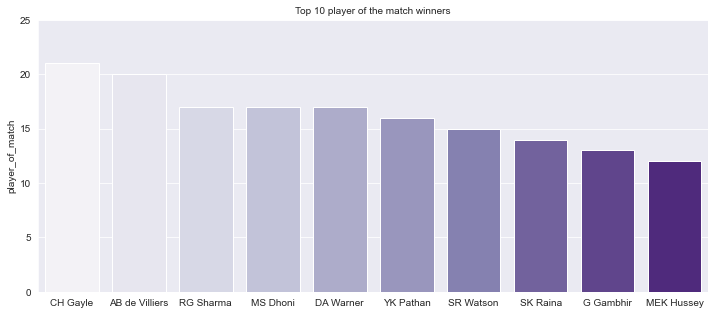

In [34]:
# visualizing top 10 players of match winner
players = ipl.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylim([0,25])
ax.set_ylabel('Counts')
ax.set_title('Top 10 player of the match winners', fontsize=10)
sns.barplot(x=players.index, y=players, palette='Purples')
plt.show()

## Comparing toss winning v/s match winning

In [35]:
toss_match = ipl['toss_winner'] == ipl['winner']
toss_match.groupby(toss_match).size()

False    363
True     393
dtype: int64

## Visualization of toss winning v/s match winning

No handles with labels found to put in legend.


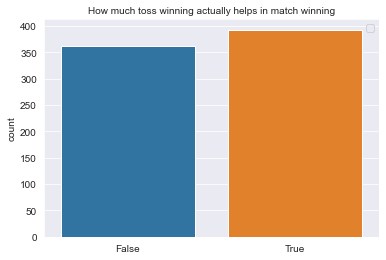

In [37]:
# sns.countplot(matches['toss_winner'] == matches['winner'])
sns.countplot(toss_match)
plt.title('How much toss winning actually helps in match winning', fontsize=10)
plt.legend()

## Visualization the graph of most successful IPL team

Text(0, 0.5, 'IPL teams')

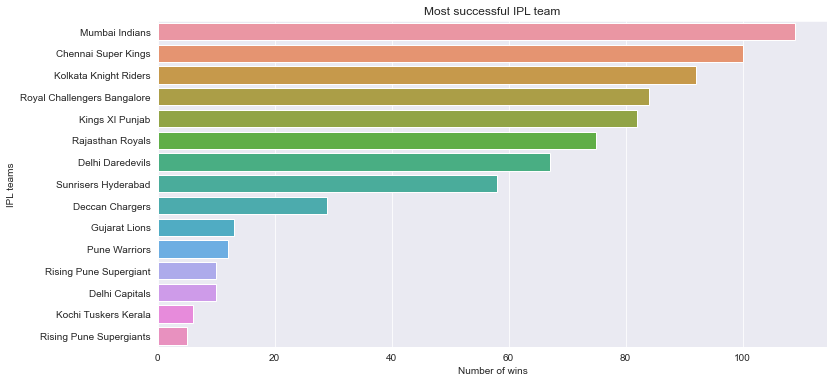

In [38]:
plt.figure(figsize=(12,6))
data = ipl.winner.value_counts()
sns.barplot(y=data.index, x=data)
plt.title('Most successful IPL team', fontsize=12)
plt.xlabel('Number of wins')
plt.ylabel('IPL teams')